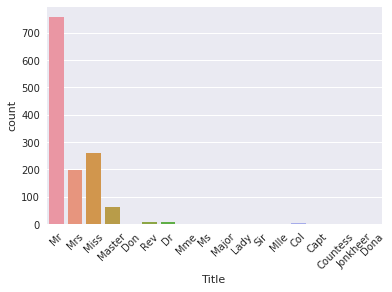

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
from sklearn import tree
from sklearn.model_selection import GridSearchCV
sns.set()
df_train=pd.read_csv('data/train.csv')
df_test=pd.read_csv('data/test.csv')
survived_train=df_train['Survived']
data=pd.concat([df_train.drop(['Survived'],axis=1),df_test])

# Extract Title from Name, store in column and plot barplot

data['Title'] = data['Name'].apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))
sns.countplot(x='Title', data=data);
plt.xticks(rotation=45);
plt.show()

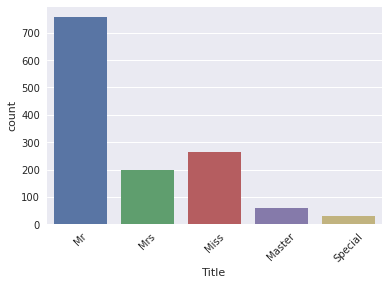

In [49]:
data['Title'] = data['Title'].replace({'Mlle':'Miss', 'Mme':'Mrs', 'Ms':'Miss'})
data['Title'] = data['Title'].replace(['Don', 'Dona', 'Rev', 'Dr',
                                            'Major', 'Lady', 'Sir', 'Col', 'Capt', 'Countess', 'Jonkheer'],'Special')

sns.countplot(x='Title', data=data);
plt.xticks(rotation=45);
plt.show()

In [50]:
data['Has_Cabin'] = ~data.Cabin.isnull()
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Has_Cabin
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,False
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,True
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,False
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,True
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,False


In [51]:
#Dropping some useless columns

data.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Has_Cabin
0,3,male,22.0,1,0,7.2500,S,Mr,False
1,1,female,38.0,1,0,71.2833,C,Mrs,True
2,3,female,26.0,0,0,7.9250,S,Miss,False
3,1,female,35.0,1,0,53.1000,S,Mrs,True
4,3,male,35.0,0,0,8.0500,S,Mr,False


In [52]:
#Imputing the Missing data

data['Age']=data['Age'].fillna(data['Age'].median())
data['Fare']=data['Fare'].fillna(data['Fare'].median())
data['Embarked']=data['Embarked'].fillna('S')
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Has_Cabin
0,3,male,22.0,1,0,7.2500,S,Mr,False
1,1,female,38.0,1,0,71.2833,C,Mrs,True
2,3,female,26.0,0,0,7.9250,S,Miss,False
3,1,female,35.0,1,0,53.1000,S,Mrs,True
4,3,male,35.0,0,0,8.0500,S,Mr,False


In [53]:
#Binning the numerical data  i.e Age and Fare

data['CatAge']=pd.qcut(data['Age'],q=4,labels=False)
data['CatFare']=pd.qcut(data['Fare'],q=4,labels=False)
data.drop(['Age','SibSp','Parch','Fare'],axis=1,inplace=True)
data.head()

,Pclass,Sex,Embarked,Title,Has_Cabin,CatAge,CatFare
0,3,male,S,Mr,False,0,0
1,1,female,C,Mrs,True,3,3
2,3,female,S,Miss,False,1,1
3,1,female,S,Mrs,True,2,3
4,3,male,S,Mr,False,2,1


In [54]:
data_dum=pd.get_dummies(data,drop_first=True)
data_dum.head()

,Pclass,Has_Cabin,CatAge,CatFare,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Special
0,3,False,0,0,1,0,1,0,1,0,0
1,1,True,3,3,0,0,0,0,0,1,0
2,3,False,1,1,0,0,1,1,0,0,0
3,1,True,2,3,0,0,1,0,0,1,0
4,3,False,2,1,1,0,1,0,1,0,0


In [55]:
data_train=data_dum.iloc[:891]
data_test=data_dum.iloc[891:]
X=data_train.values
y=survived_train.values
test=data_test.values

In [60]:
#Using GridSearch to find the best paramter

depth=np.arange(1,9)
param_grid={'max_depth':depth}
clf=tree.DecisionTreeClassifier(max_depth=3)
clf_cv=GridSearchCV(clf,param_grid=param_grid,cv=5)
clf_cv.fit(X,y)
print("Tuned Decision Tree Parameters: {}".format(clf_cv.best_params_))
print("Best score is {}".format(clf_cv.best_score_))


Tuned Decision Tree Parameters: {'max_depth': 3}
Best score is 0.8103254769921436


In [61]:
y_pred=clf_cv.predict(test)
df_test['Survived']=y_pred
df_test[['PassengerId','Survived']].to_csv('data/predictions/2nd_dec_tree_prediction.csv',index=False)
